##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

# Project Purpose
The purpose of the project is to analyze trends in voter registration in 11 different states of the United States in the 2016 and 2020 presidential elections. This project seeks to employ various Python libraries to manipulate and visualize data in an impactful way.

## Goal
The goal of this project is to clearly visualize the dataset so that a clear story is shown for viewers to understand and follow along with even without having to understand the full context of the data. In other words, the goal is to present data easily and and clearly to the viewers.

## Importance
The importance of this notebook is to show the power of data analytics and visualization that Python can achieve when working with a dataset. Furthermore, through data visualization this notebook can reveal relevanta trends in voter registration during presidential election years that can be used to continually improve and promote voter mobilization.

**Question** **1**:
How did media coverage of the presidential election impact national levels of voter registration in 2016 vs 2020?

**Question 2**:
How did shifting voter registriation politices during the 2020 presidental election season impact trends in voter registration in California compared to the 2016 presidential election?

In [3]:
voters.columns

Index(['Jurisdiction', 'Year', 'Month', 'New registered voters'], dtype='object')

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [4]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


* jurisdiction = state data was collected from
* year = year the data is from
* month = month the data is from
* new registered = newly registered voters from that month and year

Check for any missing data data. (1 point)

In [5]:
voters.isnull().any()
# All columns output false, meaning there is no missing data.

,0
Jurisdiction,False
Year,False
Month,False
New registered voters,False


Check your data types. (1 point)

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [6]:
voters = voters.rename(columns={"Jurisdiction": "Name"})

Explain any potential limitations to your data (2 points)

**Limitations of the data include: **


*   Data is only collected from the first five months of the year; is not representative of a whole year's registration trends
*   Data is only collected from two different years, 2016 and 2020; it would be helpful to have multiple years worth of data to more clearly see long term trends.
*   The dataset does not include the total number of registered voters in each month, only the newly registered voters. This may limit our understanding of voter engagement in states; if the majority of a state is already registered, it would make sense if there were less newly registered voters. This context is not provided.
*   Similarly to the point mentioned above, the total population of each state is not provided. This means there is a lack of context for examining the voter registration trends in different states. It would be nice to see what proportion of the state population is newly registering.
*  Another limitation is that no context is provided for the newly registered voters themselves. It would be interesting to have seen what proportion of young adults who have just turned 18 are registering to vote. It is impossible to tell if newly registered voters are new adults entering the voter pool, or if they are older adults who for some reason never registered before, of maybe if some of them are new citizens who never had the opportunity to register before, etc.
*  Finally, I noticed that not all states had voter registration data from May, and this could skew results in analysis or visualizations.



###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [7]:
voter_max = voters["New registered voters"].max()
voters.loc[voters["New registered voters"] == voter_max]

,Name,Year,Month,New registered voters
13,California,2020,Feb,238281


*The highest amount of new voter registration was in February 2020 in California.*

What is the average voter registration? (1 points)

In [8]:
voters["New registered voters"].mean()

48223.46226415094

*The average voter registration across all states in both 2016 and 2020 was 48,223.*

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [9]:
high_voters = voters.loc[voters["New registered voters"] > 48223]
high_voters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 93
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   36 non-null     object
 1   Year                   36 non-null     int64 
 2   Month                  36 non-null     object
 3   New registered voters  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


*There were 36 occassions where voter registration was higher than the calculated natioal average above.*

How many times did each state go above the national average for new voter registration? (2 points)



In [10]:
counting = high_voters.value_counts()
counting.groupby("Name").sum()

,count
Name,
Arizona,3
California,7
Florida,7
Georgia,1
Illinois,4
North Carolina,6
Texas,8


*Arizona went above average 3 times, California 7 times, Florida 7 times, Georgia 1 time, Illinois 4 times, North Carolina 6 times, Texas 8 times.*

Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [11]:
voters.groupby("Name")["New registered voters"].mean().sort_values(ascending=False).head(3)

,New registered voters
Name,
California,144545.375
Texas,114610.100
Florida,65868.125


*California, Texas, Florida were the three states with the highest voter registration overall.*

##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

In [12]:
by_state = voters.groupby("Name")["New registered voters"].sum().reset_index()
# by_state

In [13]:
by_state.dtypes

,0
Name,object
New registered voters,int64


<ipython-input-14-c25894cc8304>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(by_state, ax=ax, y="Name", x="New registered voters", palette = colors, orient = 'h', width=0.5)


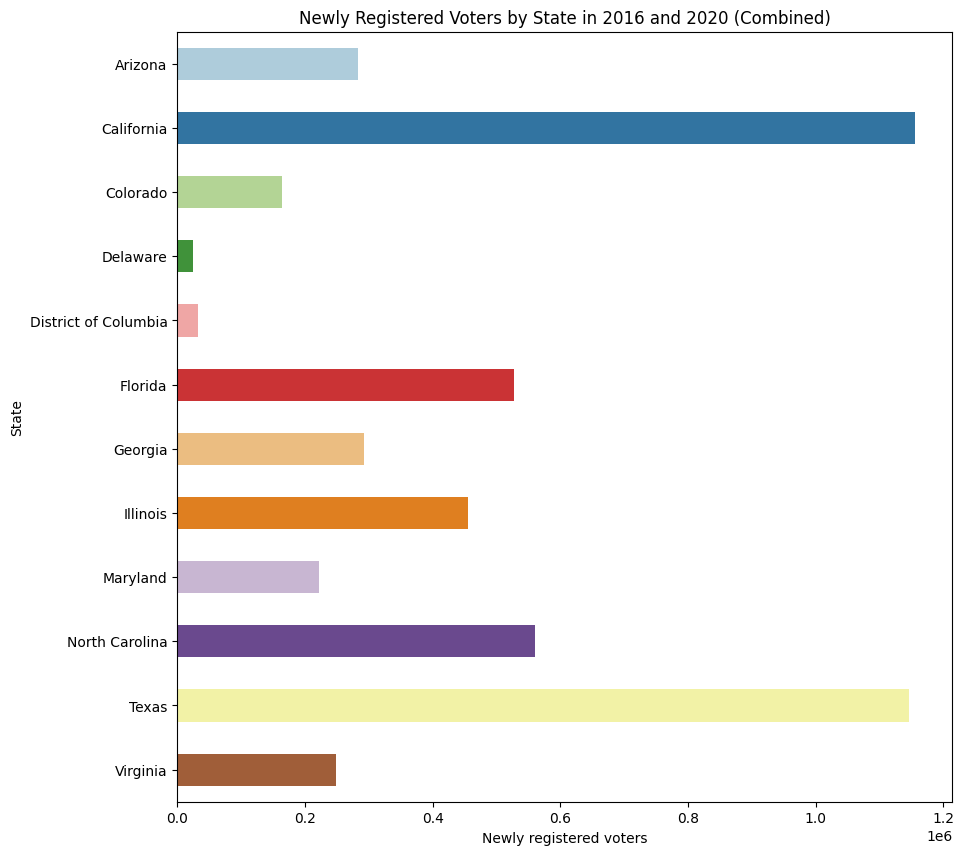

<Figure size 1000x1000 with 0 Axes>

In [14]:
colors = sns.color_palette("Paired")
fig = plt.figure(1,figsize=(10,10))
ax= fig.add_subplot()
sns.barplot(by_state, ax=ax, y="Name", x="New registered voters", palette = colors, orient = 'h', width=0.5)
plt.xlabel("Newly registered voters")
plt.ylabel("State")
plt.title("Newly Registered Voters by State in 2016 and 2020 (Combined)")
plt.figure(figsize=(10,10))
plt.show()

*One trend I notice is that there is a huge discrepancy in voter registration between states. Texas and California by far dominate average voter registration in 2016 and 2020. This is probably due to the large size and populations of these states. Delaware and the District of Columbia are both very low in their new voter registration numbers, also probably due to the fact that they are smaller states. The trend seems to be that new voter registration is directly related to the size of the state.*

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

<ipython-input-15-4f7e9b01cb6f>:1: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.barplot(voters, x="Year", y="New registered voters", hue = "Month", palette=colors)


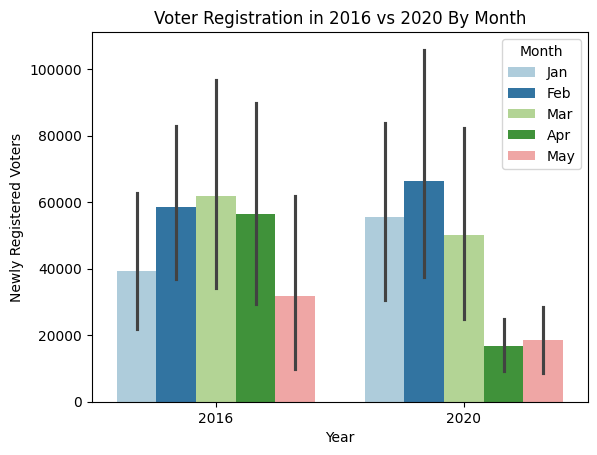

In [15]:
sns.barplot(voters, x="Year", y="New registered voters", hue = "Month", palette=colors)
plt.xlabel("Year")
plt.ylabel("Newly Registered Voters")
plt.title("Voter Registration in 2016 vs 2020 By Month")
plt.show()


# A boxplot could also work here, but I feel that the barplot is more intuitive for viewers since we are dealing with totals (sums)

# of voter registration in each month.
# sns.boxplot(voters, x="Year", y="New registered voters", hue = "Month", palette=colors)
# plt.title("Voter Registration in 2016 vs 2020 By Month")
# plt.show()

*Something common between 2016 and 2020 is that February sees higher voter registration numbers, and that May sees low voter registration. The distribution of total voter registration seems to be relatively normally distributed in 2016, but in 2020 a much higher proportion of total voter registration occurred in the first three months of the year. The error bars for all the months overlap in 2016, meaning there is not a statistically significant difference in voter registration across the months nationally. However, in 2020, the error bars for April and May barely overlap with the error bars for the rest of the month, indicating April and May may have experienced a statistically significant drop in voter registration in 2020 compared to the earlier months. The lower count for May is probably due to the fact that not every state had voter registration information from May, but the fact that April is still significantly lower in 2020 is an interesting observation*

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

<ipython-input-16-d2d4bf9607c9>:7: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.barplot(cali, x="Month", y ="New registered voters", hue="Year", palette=colors, order = order)


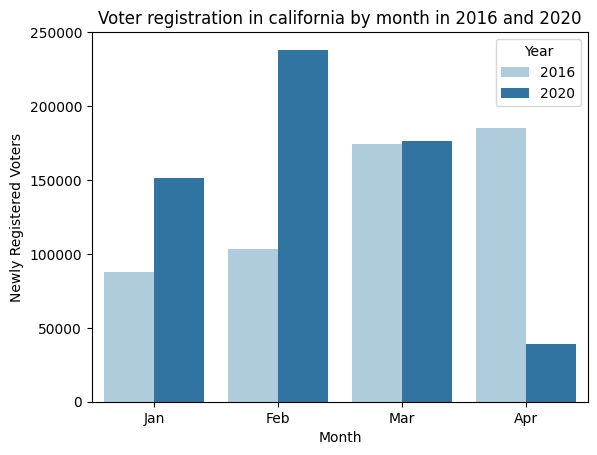

<Figure size 1000x1000 with 0 Axes>

In [16]:
# Q2: How did shifting voter registriation politices during the 2020 presidental election season impact trends in
# voter registration in California compared to the 2016 presidential election?
cali = voters.loc[voters.Name =="California"]
cali_bymonth = cali.groupby("Month")["New registered voters"].sum().reset_index()

order = ["Jan", "Feb", "Mar", "Apr"]
sns.barplot(cali, x="Month", y ="New registered voters", hue="Year", palette=colors, order = order)
plt.xlabel("Month")
plt.ylabel("Newly Registered Voters")
plt.title("Voter registration in california by month in 2016 and 2020")
plt.figure(figsize=(10,10))
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [17]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 9.07 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Set our continental US bounding box to us for the next questions. (2 points)

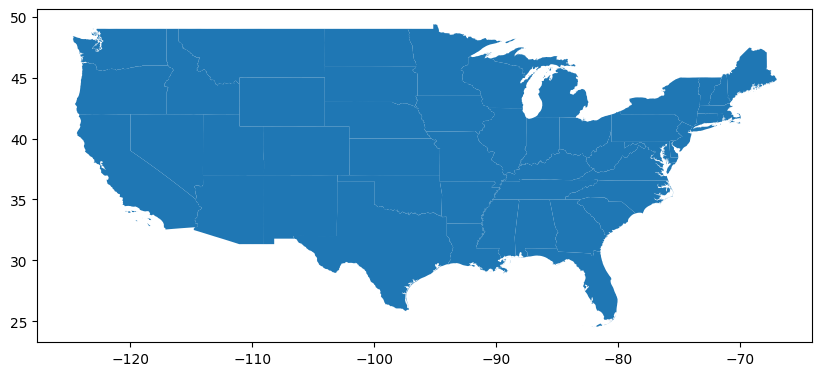

In [18]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
us = states.cx[minx:maxx, miny:maxy]

us.plot(figsize=(10, 10))
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [19]:
avg_by_state = voters.groupby("Name")["New registered voters"].mean().reset_index()
avg_by_state

,Name,New registered voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [20]:
print(us.columns)
print(avg_by_state.columns)
avg_by_state = avg_by_state.rename(columns ={"Name":"NAME"})
states_avgs = us.merge(avg_by_state, on="NAME", how="inner")
states_avgs

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')
Index(['Name', 'New registered voters'], dtype='object')


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,New registered voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

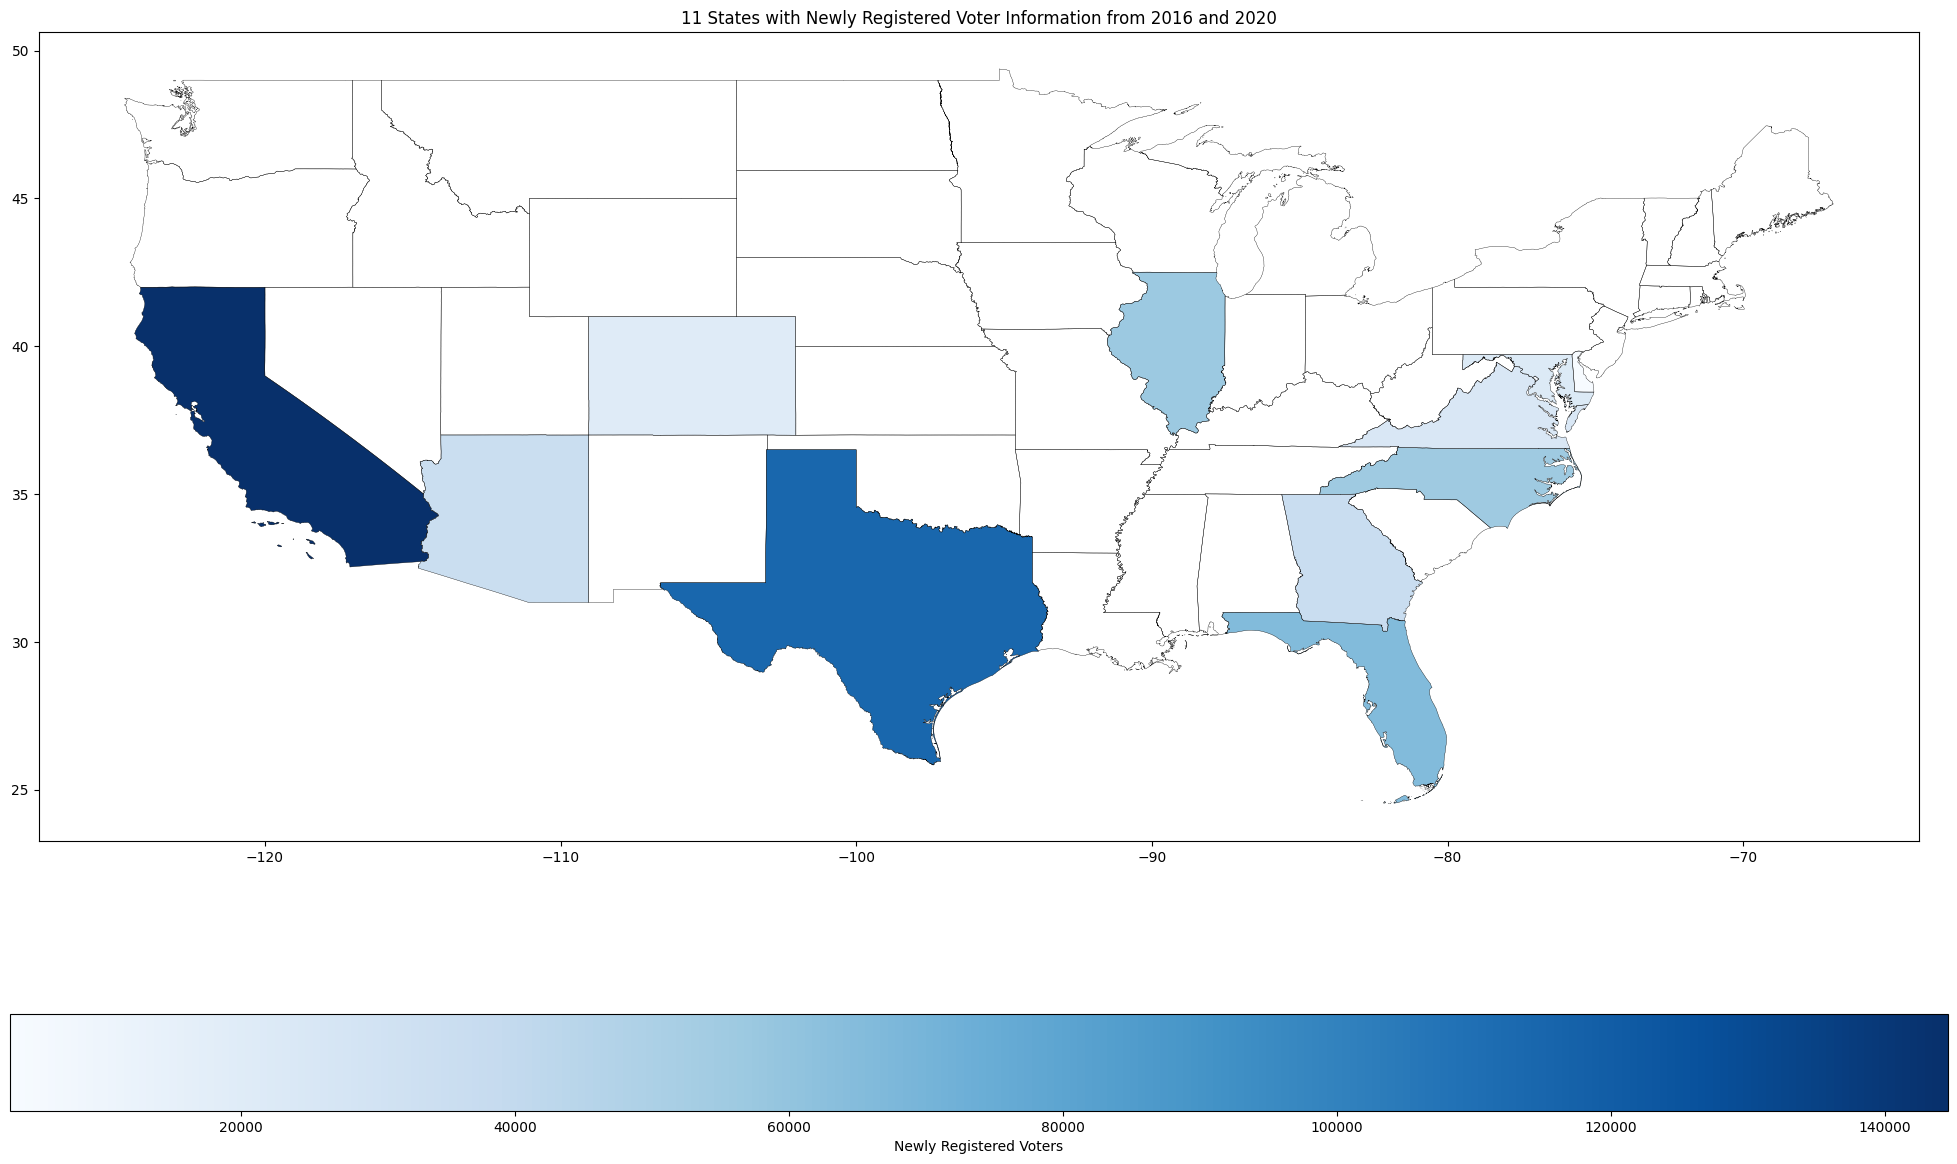

In [21]:
fig = plt.figure(1, figsize=(25,15))
ax = fig.add_subplot()
us_map = us.boundary.plot(ax=ax, linewidth=0.25, color="black", figsize=(25,15))

# EXTRA CREDIT: commented out because the text overlaps in the smaller states.
# states_avgs.apply(lambda x: ax.annotate(text=x.STUSPS,
#     xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="right",fontsize=12, color="black"),axis=1)

# states_avgs.apply(lambda x: ax.annotate(text=x["New registered voters"],
#     xy=(x.geometry.centroid.x, x.geometry.centroid.y-0.5),ha="right",fontsize=12, color="black"),axis=1)

states_avgs.plot(ax=ax, cmap="Blues", linewidth=0.25, column ="New registered voters",
                 legend_kwds={"label": "Newly Registered Voters",
            "orientation": "horizontal"}, legend=True)

plt.title("11 States with Newly Registered Voter Information from 2016 and 2020")
plt.show()



##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


#Insights
*This notebook displays that there seems to be a correlation between new voter registration and state size in 2016 and 2020. California, Texas, and Florida had the highest average voter registration in 2016 and 2020, with California and Texas being the two geographically largest states in the U.S. that are included in this notebook's dataset.*

*This notebook also shows that between 2016 and 2020, in 2016 the new voter registration seemed to be normally distributed across the months, while in 2020 April had a significant drop off in voter registration. It is of note that February and March are consistently strong months for voter registration across all states, and that the highest ever voter registration count occurred in February 2020, in California.*

*Possible explanations for the overall increase and earlier shift of voter registration would be the highly publicized nature of the 2020 election. In California specifically, the 2020 primary was shifted earlier in the year. New voting policies such as automatic voter registration and same-day voter expansion were also enacted. These factors may have increased the volume and timeline of when new voters registered in order to take part in the 2020 election.*

#Suggestions
*I would definitely suggest an expansion in data collection for my client. Having more data from other presidential election years would be helpful to paint a fuller picture of how voter registration in the US trends over time. Furthermore, I would also suggest including census information so that new voter registration numbers could be explicitly compared to state populations rather than state size, since states can differ in terms of population density.*

*Another idea I would propose to my client would be to investigate details of voter mobilization efforts and changes in voter registration policies. Used in conjunction with this numerical data, this could provide insight as to how effective mobilization efforts are over time. Conclusions drawn from those correlations could help inspire future efforts to increase voter engagement within the country.*

#Possible Next Steps
*If I were to continue working on this project, I would love to create a scatterplot visualization to see overall voter registration by month and year — I believe such a visualization would be useful in portraying new voter registration counts over time.*

*Another next step I would take would be to create a visualization that compares the change between 2016 and 2020 new voter registration between Republican and Democratic states. It would be interesting to investigate voter registration trends by political party, and if the relevant election year particularly influenced one party over another.*

*Finally, I would also love to investigate other relevant datasets from these election years to garner more demographic information about newly registered voters in each state. It would be great to further merge datasets to create more contexualized visualizations.*

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

#**Mina** **Lone**